# <center>  Uber Fare Predictive Modelling Project

![alt text](https://s.yimg.com/ny/api/res/1.2/pJAxNnEGlu1cUWp3yRCrtg--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTM5OQ--/https://o.aolcdn.com/images/dims?crop=6000%2C3742%2C0%2C0&quality=85&format=jpg&resize=1600%2C998&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2019-10%2Fee0254e0-e94b-11e9-aeb7-fe8c1e8cf00c&client=a1acac3e1b3290917d92&signature=ed9bac4d18df9368a7e0a8a6d5db8b150768c4bc "blog-image align")

# Introduction

In the rapidly evolving landscape of modern transportation, Uber has carved its niche as a trailblazer, redefining how people move from one place to another in countless cities around the world. With a vast treasure trove of data at its disposal, Uber stands to benefit greatly from the power of predictive analytics and machine learning to unlock valuable insights that can enhance its services.

This project delves into the realm of machine learning to craft predictive linear models that have the potential to offer valuable insights. Beyond the convenience it provides to riders, Uber's global presence has generated an unprecedented wealth of data, capturing the nuances of transportation demand, pricing dynamics, and user behaviors. By harnessing this data and applying advanced machine learning techniques, we aim to uncover hidden patterns and relationships that can provide Uber with a competitive edge and drive business decisions.

From optimizing pricing strategies to enhancing rider experience, from efficient allocation of resources to anticipating demand surges, these insights have the potential to revolutionize how Uber serves its customers and operates its fleet.

Data: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data

The data set of interest includes 9 predictor variables ranging from cooridnates of location of pick up, location of drop off, time of pickup, and passenger count. Data is from 4 different continents. This data was collected from 2009 to 2015 and is publicly available on kaggle.com. There are 200,000 total observations. There is some missing data.



In [46]:
#Import the packages
import numpy as np 
import pandas as pd 
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import geopy.distance
from geopy.distance import distance
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import (cross_validate , KFold , ShuffleSplit)
from sklearn.base import clone
from sklearn.preprocessing import OneHotEncoder
import statistics 
from sklearn.preprocessing import StandardScaler
from statsmodels.formula import api 
from sklearn.decomposition import PCA 
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
#Load in the library

Uber_Data = pd.read_csv('/Users/ajaybirheir/Desktop/2nd-project/uber.csv')

In [3]:
#View the data set

Uber_Data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Data Cleaning

In [4]:
#Check how many Data points are in the data set

len(Uber_Data)

200000

In [5]:
#Drop unnecessary features 

del Uber_Data['Unnamed: 0']
del Uber_Data['key']

In [6]:
#Check and see if columns are appropriate 

Uber_Data.columns.tolist()

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [7]:
#View the new updated data set

Uber_Data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
#Check the data types

Uber_Data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
#Check for null or missing values

total_missing_values = Uber_Data.isna().sum().sum() 
print(total_missing_values)

2


### Since the Dataset has 200,000 different data points, its viable to drop the 2 rows that have missing values and it will not affect accuracy by a noticable amount

In [10]:
#View rows with missing values

for index, row in Uber_Data.iterrows():
    if row.isnull().any():
        print(f'{row}')


fare_amount                             24.1
pickup_datetime      2013-07-02 03:51:57 UTC
pickup_longitude                  -73.950581
pickup_latitude                    40.779692
dropoff_longitude                        NaN
dropoff_latitude                         NaN
passenger_count                            0
Name: 87946, dtype: object


In [11]:
#It was just one row with 2 missing values, we can easily drop it and verify count drops to 19999

Uber_Data.dropna(inplace = True)
len(Uber_Data)

199999

In [12]:
#Let's Create a distance column, it will be valuable to see how distance affects the fare amount

Uber_Data = Uber_Data[(Uber_Data.pickup_latitude < 90) & (Uber_Data.dropoff_latitude < 90) &
                      (Uber_Data.pickup_latitude > -90) & (Uber_Data.dropoff_latitude > -90) &
                      (Uber_Data.pickup_longitude < 180) & (Uber_Data.dropoff_longitude < 180) &
                      (Uber_Data.pickup_longitude > -180) & (Uber_Data.dropoff_longitude > -180)]






# Calculate the distance for each row and assign it to the 'Distance' column using .loc

Uber_Data['Distance'] = Uber_Data.apply(lambda row: round(distance((row['pickup_latitude'], row['pickup_longitude']),
                                                               (row['dropoff_latitude'], row['dropoff_longitude'])).miles, 3), axis=1)



In [13]:
#Distance column has been added (in miles)

Uber_Data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.045
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1.525
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,3.131
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.032
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2.786


In [14]:
#Split the time of pick up into Month, Year, Weekday, and Hour variables


Uber_Data.pickup_datetime=pd.to_datetime(Uber_Data.pickup_datetime)

Uber_Data['year'] = Uber_Data.pickup_datetime.dt.year
Uber_Data['month'] = Uber_Data.pickup_datetime.dt.month
Uber_Data['weekday'] = Uber_Data.pickup_datetime.dt.weekday
Uber_Data['hour'] = Uber_Data.pickup_datetime.dt.hour

Uber_Data['Monthly_Quarter'] = Uber_Data.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
Uber_Data['Hourly_Segments'] = Uber_Data.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

Uber_Data.drop(['pickup_datetime','month', 'hour'], axis=1, inplace=True)

In [15]:
Uber_Data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,weekday,Monthly_Quarter,Hourly_Segments
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.045,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1.525,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,3.131,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.032,2009,4,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2.786,2014,3,Q3,H5


# EDA 

In [16]:
#Creating a heatmap to view where these Uber rides take place

m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = [[row['pickup_latitude'], row['pickup_longitude']] for index, row in Uber_Data.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('heatmap.html')



In [17]:
IFrame('heatmap.html', width = 700, height = 400)

Data points are from 4 different continents: North america, South america, Europe and Africa

Heatmap suggest a majority of these datapoints are concentrated in the eastern united states.

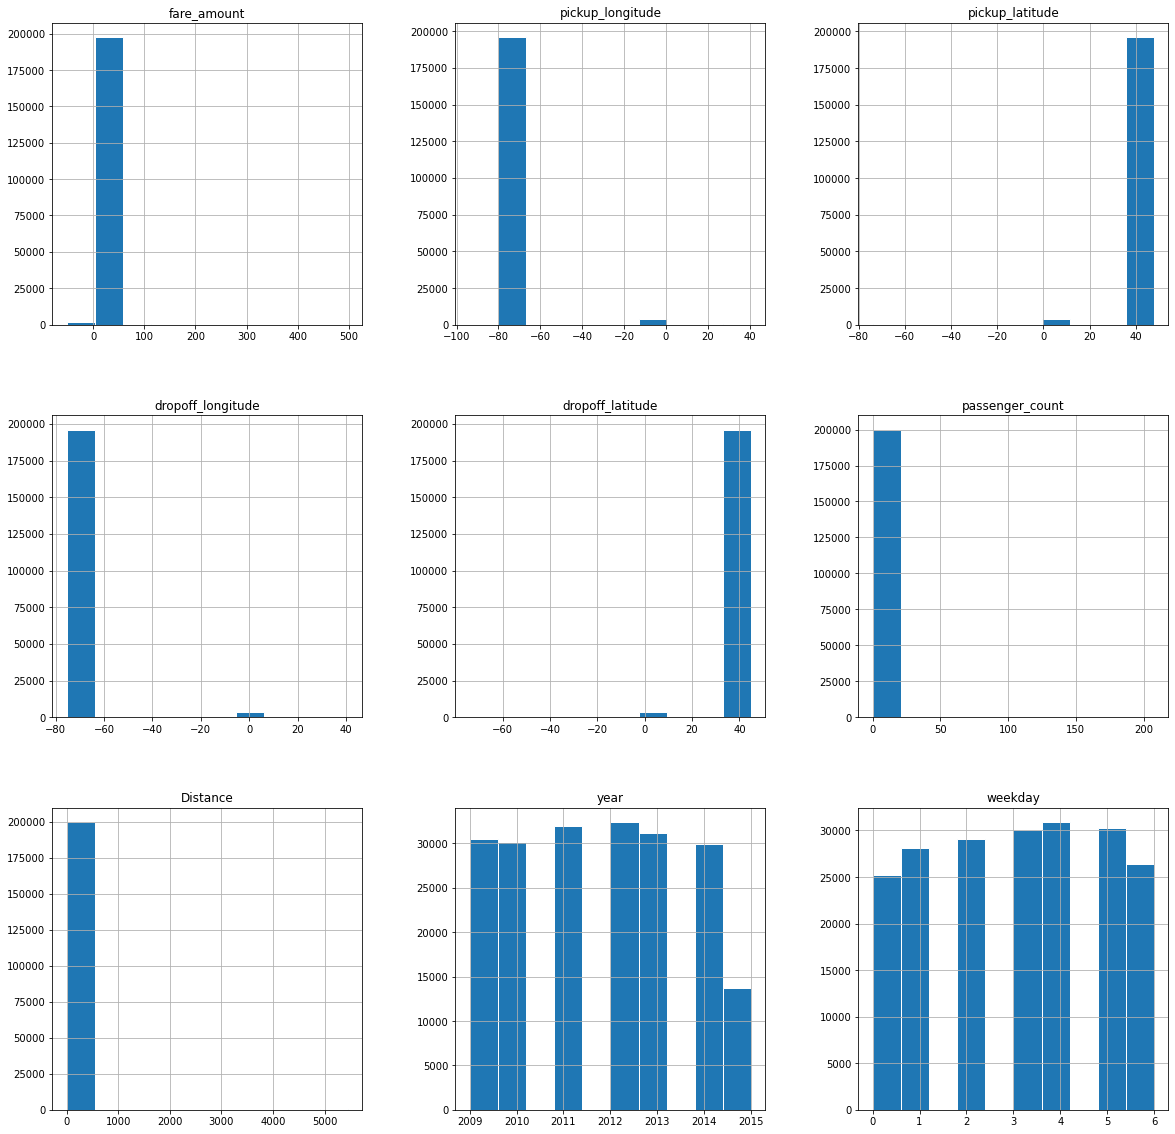

In [18]:
#General overview of predictor distributions

Uber_Data.hist(figsize = (20,20), edgecolor = 'white')
plt.show()

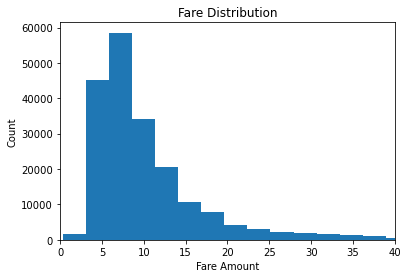

In [19]:
plt.hist(Uber_Data['fare_amount'], bins = 200)
plt.xlim(0,40)
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [20]:
statistics.mean(Uber_Data['fare_amount'])

11.359849140194113

Here the distribution of Uber fares is skewed. Uber can on average expect to generate $8.5 worth of fare per ride.

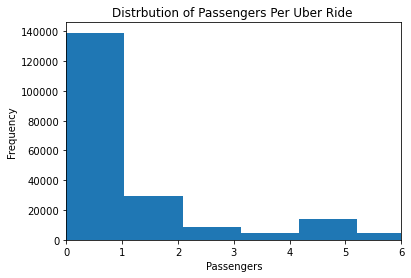

In [21]:
plt.hist(Uber_Data['passenger_count'], bins = 200)
plt.xlim(0,6)
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.title('Distrbution of Passengers Per Uber Ride ')
plt.show()

This data set contains a majority of data from 1 passenger rides. 

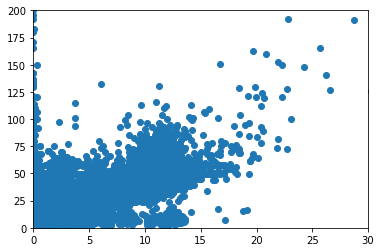

In [22]:
plt.scatter(Uber_Data['Distance'], Uber_Data['fare_amount'])
plt.xlim(0,30)
plt.ylim(0,200)
plt.show()

Strong positive correlation exists between distance and fare amount. 

In [23]:
#View how many uber rides were over 1000 miles long

print(Uber_Data['Distance'].describe())

count = 0
for value in Uber_Data['Distance']:
    if value > 1000:
        count += 1
print(count)

count    199987.000000
mean         12.777543
std         235.912119
min           0.000000
25%           0.755000
50%           1.318000
75%           2.407000
max        5457.872000
Name: Distance, dtype: float64
420


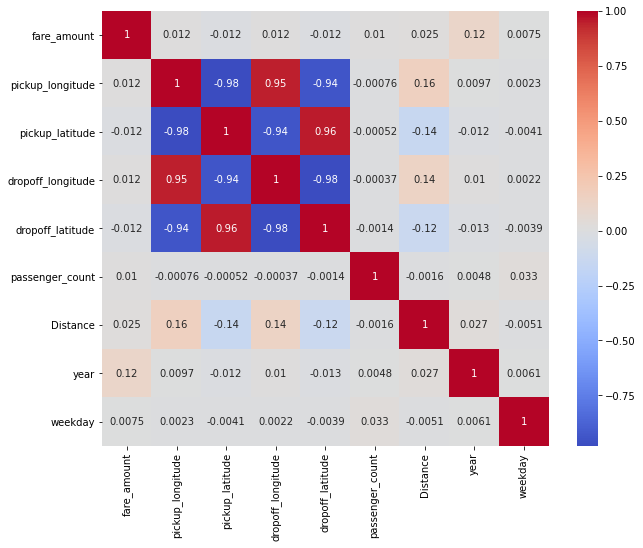

In [24]:
#make a correlation matrix

plt.figure(figsize = (10,8))
corr_matrix = Uber_Data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

Correlation plot reveals that price is not a linear transformation of any variable which is adequate for fitting linear models. Appears to be multicollinearity among the coordinates, will be removing those for linear regresion models

# Data Preprocessing

In [25]:
#Removing Outliers

#We are using the IQR method to determine outliars. If a data point lies above Q3 + 1.5*IQR or below Q1 - 1.5*IQR
#its an outliar

# Define columns for outlier removal

columns_to_process = ['fare_amount', 'Distance']

# Calculate the IQR for the selected columns
for col in columns_to_process:
    Q1 = Uber_Data[col].quantile(0.25)
    Q3 = Uber_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers for the selected column
    Uber_Data = Uber_Data[(Uber_Data[col] >= lower_bound) & (Uber_Data[col] <= upper_bound)]

In [26]:
Uber_Data = Uber_Data[Uber_Data['passenger_count'] != 208]

In [27]:
#Testing cell to check if outlier removal is doing its thing 

print(max(Uber_Data['passenger_count']))
print(sum(Uber_Data['passenger_count'] > 7))

6
0


In [28]:
# One-hot encode each column individually

one_hot_passenger_count = pd.get_dummies(Uber_Data['passenger_count'], prefix='passenger_count')
two_hot_year = pd.get_dummies(Uber_Data['year'], prefix='year')
three_hot_weekday = pd.get_dummies(Uber_Data['weekday'], prefix='weekday')
four_hot_monthly_quarter = pd.get_dummies(Uber_Data['Monthly_Quarter'], prefix='Monthly_Quarter')
five_hot_hourly_segments = pd.get_dummies(Uber_Data['Hourly_Segments'], prefix='Hourly_Segments')

# Join the one-hot encoded columns back to the original DataFrame
check_df = Uber_Data.join([one_hot_passenger_count, two_hot_year, three_hot_weekday, four_hot_monthly_quarter, five_hot_hourly_segments])

# Display the first few rows of the resulting DataFrame
check_df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,weekday,Monthly_Quarter,...,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H1,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.045,2015,3,Q2,...,0,1,0,0,0,0,0,0,1,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,1.525,2009,4,Q3,...,0,0,1,0,0,0,0,0,0,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,3.131,2009,0,Q3,...,0,0,1,0,0,0,0,0,0,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.032,2009,4,Q2,...,0,1,0,0,0,0,1,0,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2.786,2014,3,Q3,...,0,0,1,0,0,0,0,0,1,0


In [29]:
#Switching column names

checker_df = check_df.rename(columns = {1 : 'passenger_count_1',
                         2 : 'passenger_count_2',
                         3 : 'passenger_count_3',
                         4 : 'passenger_count_4',
                         5 : 'passenger_count_5',
                         6 : 'passenger_count_6'})

In [30]:
#remove old columns

del checker_df['weekday']
del checker_df['year']
del checker_df['Monthly_Quarter']
del checker_df['Hourly_Segments']
del checker_df['passenger_count']
del checker_df['passenger_count_0']

In [31]:
checker_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'Distance',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'Monthly_Quarter_Q1', 'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3',
       'Monthly_Quarter_Q4', 'Hourly_Segments_H1', 'Hourly_Segments_H2',
       'Hourly_Segments_H3', 'Hourly_Segments_H4', 'Hourly_Segments_H5',
       'Hourly_Segments_H6'],
      dtype='object')

In [32]:
#Update the Uber_data with one hot encoded dummy variables 

Uber_Data = checker_df

In [33]:
#Verify changes

Uber_Data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H1,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.045,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.525,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,3.131,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1.032,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,2.786,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Splitting Into testing and training sets  

In [34]:

X = Uber_Data.drop(['fare_amount'], axis = 1)
Y = Uber_Data['fare_amount']



X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.80, test_size = 0.20, random_state = 100)
X_train.reset_index(drop=True,inplace=True)


print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 139624
Testing set size: 34906


#### Standardizing the features

In [35]:
std = StandardScaler()

#first standardize the training set

Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())



,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,...,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H1,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
count,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,...,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05,1.396240e+05
mean,7.092398e-17,1.624557e-16,-2.909628e-16,9.564899e-16,4.617559e-16,1.687755e-15,-7.323668e-17,-1.960137e-16,-3.760638e-15,-6.053007e-16,...,-1.463961e-15,-1.712711e-15,-1.485759e-15,-5.991295e-16,-2.274939e-15,7.051646e-17,1.674973e-15,-6.297441e-15,9.907737e-16,-2.244518e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.754213e-01,-1.870307e+01,-2.743357e-01,-1.870307e+01,-1.526606e+00,-1.504025e+00,-4.137808e-01,-2.152012e-01,-1.464571e-01,-2.752006e-01,...,-6.052970e-01,-6.171253e-01,-5.332426e-01,-5.537208e-01,-3.369504e-01,-2.827464e-01,-4.831660e-01,-4.983119e-01,-5.259030e-01,-5.298072e-01
25%,-1.403144e-01,1.316959e-01,-1.403795e-01,1.316360e-01,-7.481169e-01,-1.504025e+00,-4.137808e-01,-2.152012e-01,-1.464571e-01,-2.752006e-01,...,-6.052970e-01,-6.171253e-01,-5.332426e-01,-5.537208e-01,-3.369504e-01,-2.827464e-01,-4.831660e-01,-4.983119e-01,-5.259030e-01,-5.298072e-01
50%,-1.393431e-01,1.343684e-01,-1.393544e-01,1.344461e-01,-2.328102e-01,6.648827e-01,-4.137808e-01,-2.152012e-01,-1.464571e-01,-2.752006e-01,...,-6.052970e-01,-6.171253e-01,-5.332426e-01,-5.537208e-01,-3.369504e-01,-2.827464e-01,-4.831660e-01,-4.983119e-01,-5.259030e-01,-5.298072e-01
75%,-1.380921e-01,1.366242e-01,-1.380623e-01,1.366789e-01,5.567370e-01,6.648827e-01,-4.137808e-01,-2.152012e-01,-1.464571e-01,-2.752006e-01,...,1.652081e+00,1.620417e+00,-5.332426e-01,-5.537208e-01,-3.369504e-01,-2.827464e-01,-4.831660e-01,-4.983119e-01,-5.259030e-01,-5.298072e-01
max,1.097374e+01,8.367298e-01,1.097607e+01,8.367080e-01,2.911003e+00,6.648827e-01,2.416739e+00,4.646814e+00,6.827938e+00,3.633712e+00,...,1.652081e+00,1.620417e+00,1.875319e+00,1.805964e+00,2.967796e+00,3.536738e+00,2.069682e+00,2.006775e+00,1.901491e+00,1.887479e+00


In [36]:
#Standardize the test set 

Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())



,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,...,Monthly_Quarter_Q1,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H1,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
count,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,...,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000,34906.000000
mean,0.005408,-0.002617,0.005403,-0.002613,-0.010921,0.003511,-0.009710,0.003204,0.011589,-0.003639,...,0.004026,-0.006298,0.000966,0.001487,-0.000568,-0.014553,-0.010422,-0.004988,0.021592,0.002805
std,1.012099,0.974504,1.012101,0.974506,0.995189,0.998534,0.990194,1.007083,1.037943,0.993877,...,1.002111,0.996830,1.000662,1.000944,0.999267,0.975940,0.991658,0.996233,1.014527,1.001913
min,-0.207851,-18.702978,-0.207972,-18.702515,-1.526606,-1.504025,-0.413781,-0.215201,-0.146457,-0.275201,...,-0.605297,-0.617125,-0.533243,-0.553721,-0.336950,-0.282746,-0.483166,-0.498312,-0.525903,-0.529807
25%,-0.140323,0.131723,-0.140388,0.131662,-0.753646,-1.504025,-0.413781,-0.215201,-0.146457,-0.275201,...,-0.605297,-0.617125,-0.533243,-0.553721,-0.336950,-0.282746,-0.483166,-0.498312,-0.525903,-0.529807
50%,-0.139353,0.134360,-0.139376,0.134431,-0.250503,0.664883,-0.413781,-0.215201,-0.146457,-0.275201,...,-0.605297,-0.617125,-0.533243,-0.553721,-0.336950,-0.282746,-0.483166,-0.498312,-0.525903,-0.529807
75%,-0.138106,0.136573,-0.138087,0.136657,0.546785,0.664883,-0.413781,-0.215201,-0.146457,-0.275201,...,1.652081,1.620417,-0.533243,-0.553721,-0.336950,-0.282746,-0.483166,-0.498312,-0.525903,-0.529807
max,10.969341,0.235061,10.970479,0.235050,2.911003,0.664883,2.416739,4.646814,6.827938,3.633712,...,1.652081,1.620417,1.875319,1.805964,2.967796,3.536738,2.069682,2.006775,1.901491,1.887479


                                       Correlation Matrix                                       


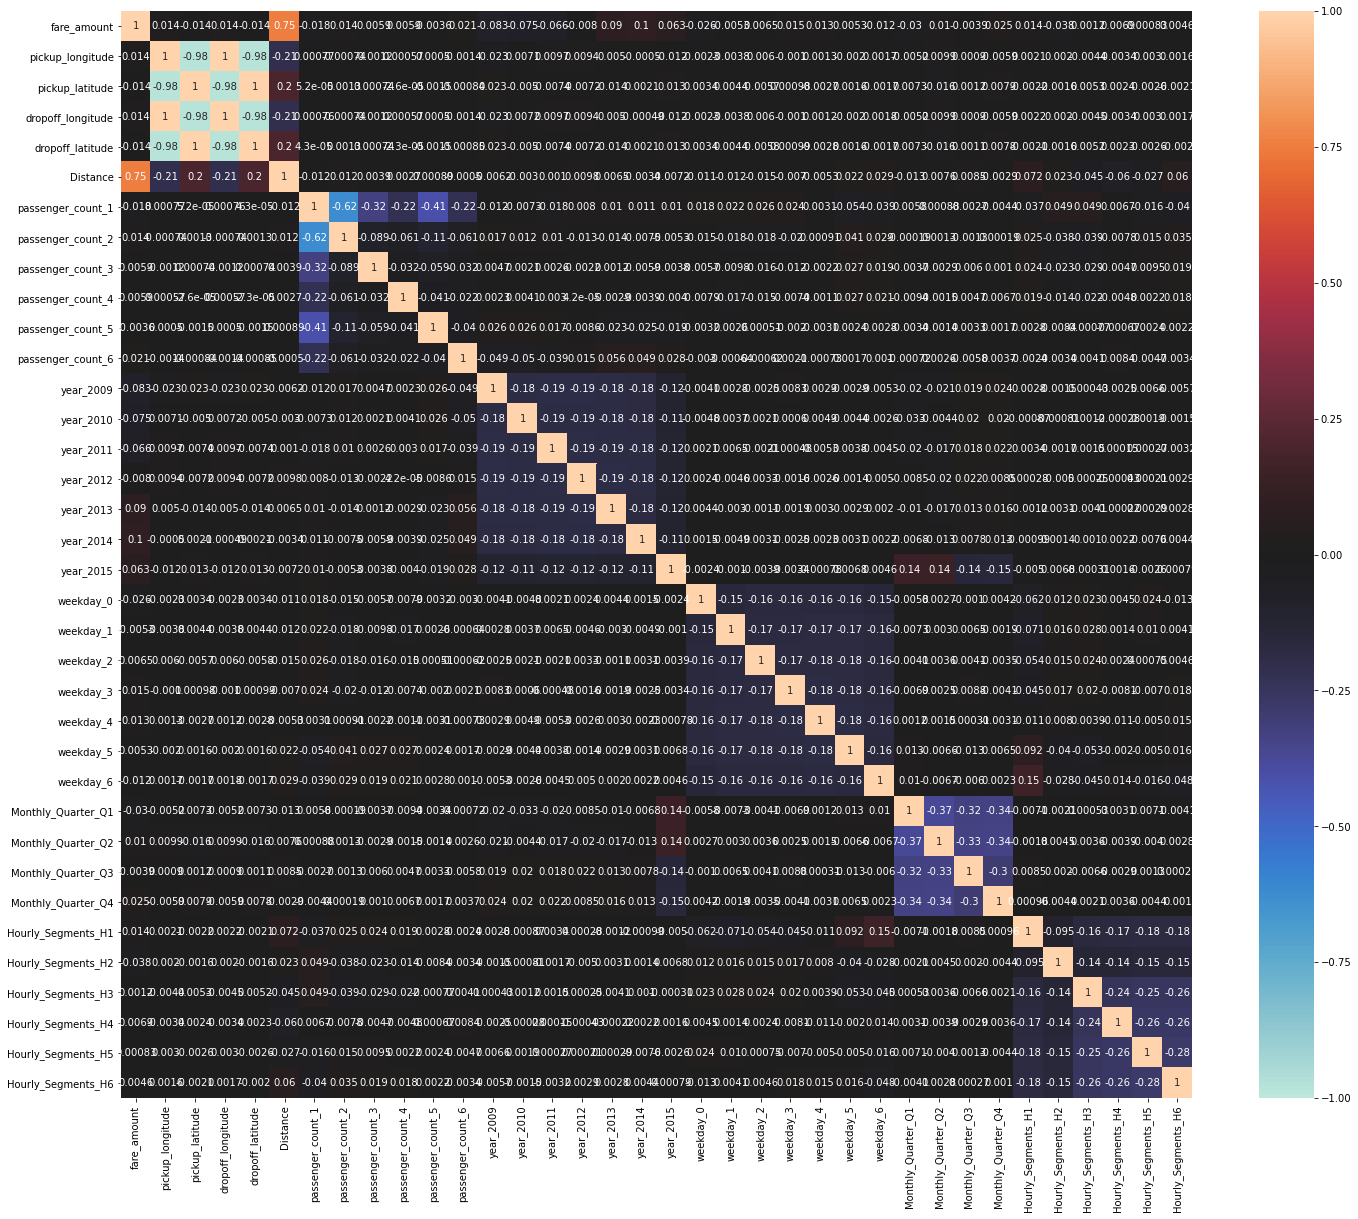

In [37]:
#Checks for multicolinearity via correlation plot

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(Uber_Data.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

## There appears to be correlation between latitude and longitude and the different passenger counts. This may cause inaccurate coefficients in linear models fitted to the data.

In [38]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([X_train,Y_train.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

#API = api.ols(formula='{} ~ {}'.format('fare_amount',' + '.join(i for i in X_train.columns)), data=Train_xy).fit()
API = api.ols(formula='fare_amount ~ {}'.format(' + '.join(X_train.columns)), data=Train_xy).fit()

#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     8456.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:59:45   Log-Likelihood:            -3.0806e+05
No. Observations:              139624   AIC:                         6.162e+05
Df Residuals:                  139592   BIC:                         6.165e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0863      0.063     81.329      0.000       4.964       5.209
pickup_longitude      -2.9365      0.388     -7.567      0.000      -3.697      -2.176
pickup_latitude        9.0065      0.341     26.387      0.000       8.338       9.676
dropoff_longitude      3.0762      0.388      7.927      0.000       2.316       3.837
dropoff_latitude      -8.8777      0.341    -26.010      0.000      -9.547      -8.209
Distance               3.3152      0.007    491.838      0.000       3.302       3.328
passenger_count_1      0.2456      0.098      2.513      0.012       0.054       0.437
passenger_count_2      0.3909      0.099      3.962      0.000       0.198       0.584
passenger_count_3      0.4013      0.101      3.958      0.000       0.203       0.600
passenger_count_4      0.4862      0.106      4.605      0.000       0.279       0.693
passenger_count_5      0.3511      0.100      3.513      0.000       0.155       0.547
passenger_count_6      0.3551      0.106      3.358      0.001       0.148       0.562
year_2009             -0.0417      0.017     -2.475      0.013      -0.075      -0.009
year_2010             -0.0556      0.017     -3.304      0.001      -0.089      -0.023
year_2011              0.0391      0.016      2.455      0.014       0.008       0.070
year_2012              0.4790      0.016     29.551      0.000       0.447       0.511
year_2013              1.3734      0.017     81.510      0.000       1.340       1.406
year_2014              1.5628      0.017     91.631      0.000       1.529       1.596
year_2015              1.7293      0.023     75.715      0.000       1.685       1.774
weekday_0              0.5310      0.018     30.071      0.000       0.496       0.566
weekday_1              0.7745      0.017     45.444      0.000       0.741       0.808
weekday_2              0.8934      0.017     53.067      0.000       0.860       0.926
weekday_3              0.9362      0.017     55.956      0.000       0.903       0.969
weekday_4              0.9101      0.017     54.895      0.000       0.878       0.943
weekday_5              0.6463      0.017     38.592      0.000       0.614       0.679
weekday_6              0.3948      0.018     22.282      0.000       0.360       0.430
Monthly_Quarter_Q1     1.0539      0.018     56.995      0.000       1.018       1.090
Monthly_Quarter_Q2     1.2279      0.018     66.404      0.000       1.192       1.264
Monthly_Quarter_Q3     1.2740      0.019     66.796      0.000       1.237       1.311
Monthly_Quarter_Q4     1.5304      0.019     80.835      0.000       1.493       1.568
Hourly_Segments_H1     0.5447      0.020     27.405      0.000       0.506       0.584
Hourly_Segments_H2     0.1711      0.022      7.898      0.000       0.129       0.214
Hourly_Segments_H3     1.2421      0.0

# Recursive Feature Selection

100%|██████████| 34/34 [00:40<00:00,  1.20s/it]


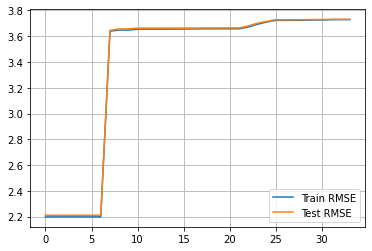

In [39]:
#USING RFE

Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=Uber_Data.shape[1]-2
for i in tqdm(range(m)):
    lm = LinearRegression()

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Y_train)
    


    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Y_train)
    


    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Y_test, pred2)))
        


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [40]:
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Uber_Data.shape[1]-23)           
rfe = rfe.fit(Train_X_std, Y_train)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Y_train)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Y_train, pred1)))
print(np.sqrt(mean_squared_error(Y_test, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

3.670594490117418
3.678924889250939


### Train different models on the K folds cross validation and see which gives the lowest mean absolute error



In [48]:
#Trying a different way to obtain the model metrics 
from sklearn import tree, model_selection

kfold = model_selection.KFold(n_splits=10)



# Multiple Linear Regression

In [42]:
#Multiple linear regression on CV set 

print('Linear regression metrics on CV set')
print('-----')

MLR = LinearRegression().fit(Train_X_std,Y_train)

#train neg_mean_abs_error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(MLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", -1*results.mean())
print("Standard Deviation: ", results.std())

print('-----')

scoring = "r2"
results = model_selection.cross_val_score(MLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("R-squared: ", results.mean()); print("Standard Deviation: ", results.std())

Linear regression metrics on CV set
-----
Mean Absolute Error:  1.5364034267146554
Standard Deviation:  0.007468220093973447
-----
R-squared:  0.6522931364877956
Standard Deviation:  0.006616307483961721


# Lasso Regression

In [43]:
#Lasso regression on CV set 


print('Lasso regression metrics on CV set')
print('-----')

LLR = Lasso().fit(Train_X_std,Y_train)

#train neg_mean_abs_error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(LLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", -1*results.mean())
print("Standard Deviation: ", results.std())

scoring = "r2"
results = model_selection.cross_val_score(LLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("R-squared: ", results.mean()); print("Standard Deviation: ", results.std())

Lasso regression metrics on CV set
-----
Mean Absolute Error:  1.9836194068632942
Standard Deviation:  0.013348097631431372
R-squared:  0.504572506674537
Standard Deviation:  0.004572990528305884


# Ridge Regression

In [44]:
#Ridge regression on CV set 


print('Ridge regression metrics on CV set')
print('-----')

RLR = Ridge().fit(Train_X_std,Y_train)

#train neg_mean_abs_error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(RLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("Negative Mean Absolute Error: ", -1*results.mean())
print("Standard Deviation: ", results.std())

scoring = "r2"
results = model_selection.cross_val_score(RLR, X_train, Y_train, cv=kfold, scoring=scoring)
print("R-squared: ", results.mean()); print("Standard Deviation: ", results.std())

Ridge regression metrics on CV set
-----
Negative Mean Absolute Error:  1.536296112171946
Standard Deviation:  0.00747549538380359
R-squared:  0.6522877154531396
Standard Deviation:  0.0066314230048012505


### Lasso regression has the least Mean absolute error across the folds, fit to the test set 

In [45]:
#Ridge regression model fitted to all training data and tested on test set
RLR = Ridge().fit(Train_X_std,Y_train)


RLR.fit(X_train, Y_train)


Y_test_pred = RLR.predict(X_test)


test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print("Test Mean Absolute Error: ", test_mae)
print("Test R-Squared : ", test_r2)


Test Mean Absolute Error:  1.5390290942279674
Test R-Squared :  0.6489354183568111


# Conclusion

The primary objective of this project was to assess and determine the most effective model for predicting Uber fares. The project unfolded through a series of tasks, including Exploratory Data Analysis (EDA), comprehensive data cleaning procedures, outlier detection and removal, data preprocessing operations, and the application of Recursive Feature Elimination (RFE). 

Three distinct regression models were deployed and evaluated across cross-validation folds to ascertain their predictive capabilities. Among these models, the Ridge regression model was the best performer, demonstrating the lowest Mean Absolute Error (MAE) when applied to the K-folds.

Subsequently, the Ridge regression model was selected for finalization and was further trained on the entire training dataset. This model was then subjected to testing on a dedicated test dataset, yielding promising testing metrics. The Test Mean Absolute Error (MAE) was computed at 1.53, signifying that, on average, the model's predictions deviated from actual fares by a mere $1.53.

The project's success in minimizing prediction errors contributes valuable insights to fare prediction within the ride-sharing industry, offering the potential for enhanced pricing strategies and improved user experiences.
